<a href="https://colab.research.google.com/github/HarshNVyas/ML-Projects/blob/main/Kaggle/Digit%20Recognizer/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frame the problem

The MNIST dataset is a collection of handwritten digits commonly used for training various image processing systems. Our objective is to develop a model that can accurately recognize these handwritten digits.

# Get the Data

In [ ]:
from sklearn.datasets import fetch_openml

# Load data from openml.org
mnist = fetch_openml('mnist_784',as_frame=False)
X, y = mnist["data"], mnist["target"]

# Convert the target to integers
y = y.astype(int)
y

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
type(y)

numpy.ndarray

# Explore the Data

           0        1        2        3        4        5        6        7    \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

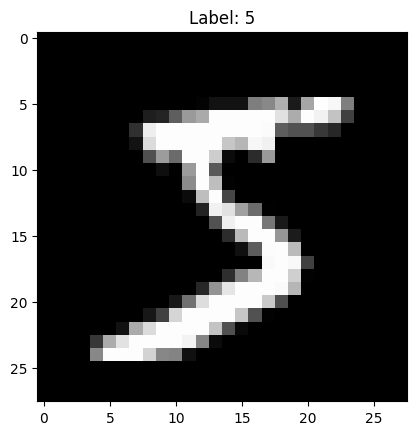

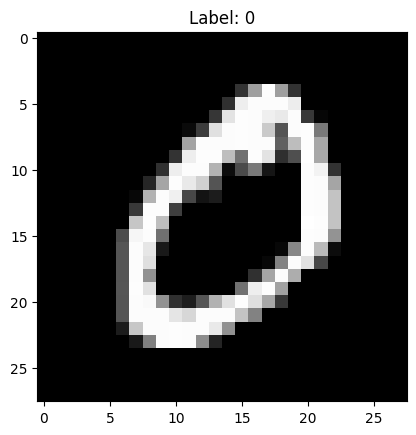

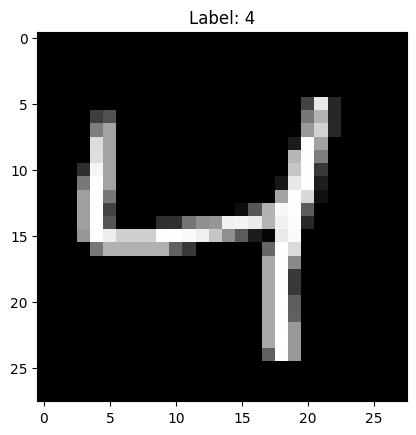

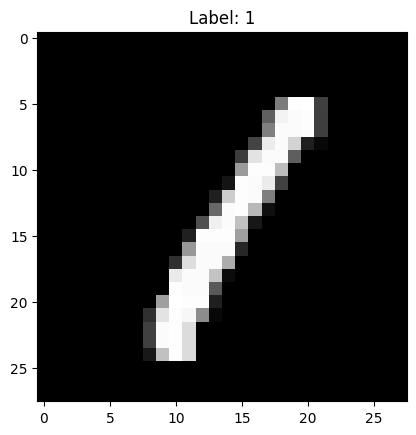

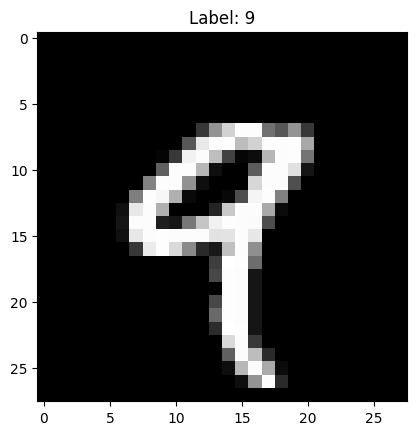

In [ ]:
# Import necessary libraries for data exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the data to a Pandas DataFrame for easier manipulation
X = pd.DataFrame(X)

# Basic statistics
print(X.describe())

# Visualize a few digits
for i in range(5):
    digit = X.iloc[i].values.reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.show()

<Axes: xlabel='0'>

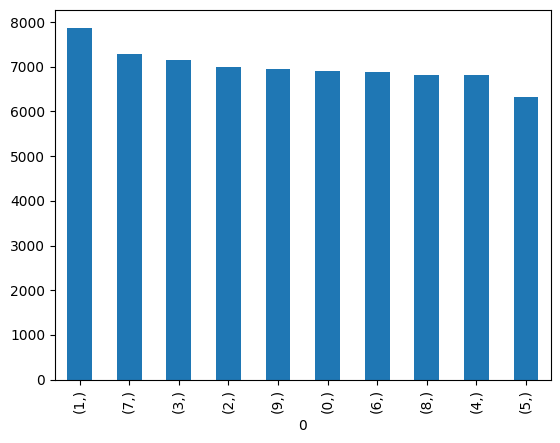

In [ ]:
y = pd.DataFrame(y)
y.value_counts().plot(kind='bar')

In [ ]:
import numpy as np
np.array(X.iloc[0]).reshape(28,28)
np.array(X.iloc[0]).max()

255.0

# Prepare the Data

In [ ]:
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# X_train, X_val, y_train, y_val = X_train[:5000]
#  the data
X_train_new, X_test_new = X_train*1.0/255.0, X_test*1.0/255.0
np.array(X_train_new).max()

1.0

# Explore the Data with Different Classifiers

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize classifiers
sgd_clf = SGDClassifier(random_state=42)
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier(random_state=42)

# Function to evaluate classifiers
def evaluate_classifier(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print(f"{clf.__class__.__name__}: Accuracy: {round((scores.mean()*100),2)}%")

# Evaluate each classifier
for clf in (sgd_clf, nb_clf, rf_clf):
    evaluate_classifier(clf, X_train_new, y_train)

SGDClassifier: Accuracy: 91.02%
GaussianNB: Accuracy: 55.89%
RandomForestClassifier: Accuracy: 96.46%


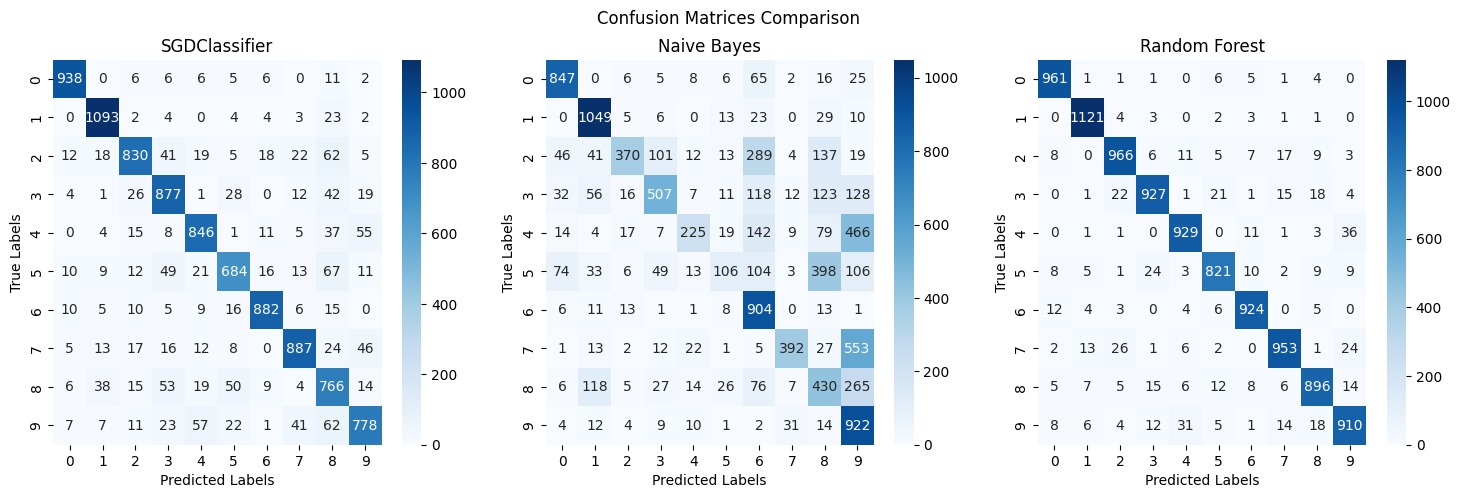

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Correct use of cross_val_predict
y_pred_sgd = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
y_pred_nb = cross_val_predict(nb_clf, X_test, y_test, cv=3)
y_pred_rf = cross_val_predict(rf_clf, X_test, y_test, cv=3)

# Evaluation
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion matrices data
conf_matrices = {
    "SGDClassifier": conf_matrix_sgd,
    "Naive Bayes": conf_matrix_nb,  # Corrected the name
    "Random Forest": conf_matrix_rf
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison')

for i, (model, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.show()


# Fine-Tune the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine tuning RandomForest
param_grid = {'n_estimators': [10, 50, 100], 'max_features': [10, 50, 784]}

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_new, y_train)

# Best parameters
print(grid_search.best_params_)

{'max_features': 50, 'n_estimators': 100}


In [ ]:
grid_search.best_score_

0.9646666666666667

In [ ]:
from joblib import dump
dump(rf_clf, 'Best_model_MNIST.joblib')

['Best_model_MNIST.joblib']

# Expanding the data

## Data Augmentation or Training Set Expansion

Expanding data from shifting data to left, right, up and down from the normal position.

For example: for data index 0:

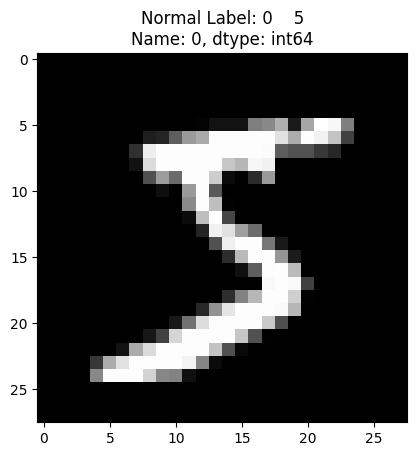
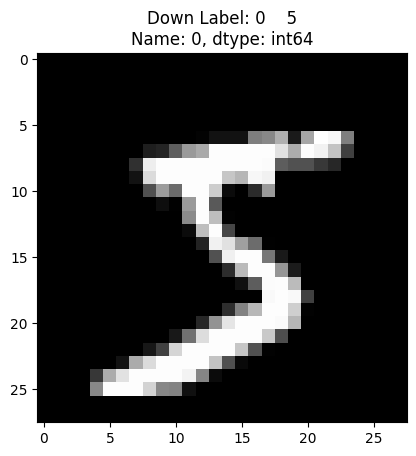
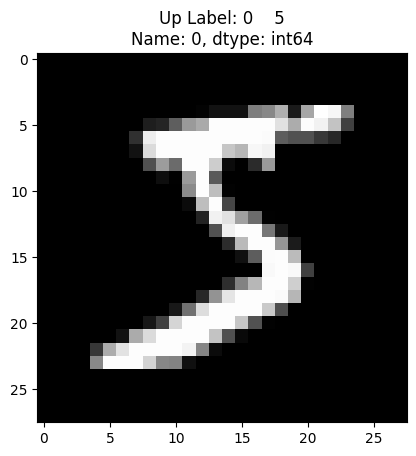
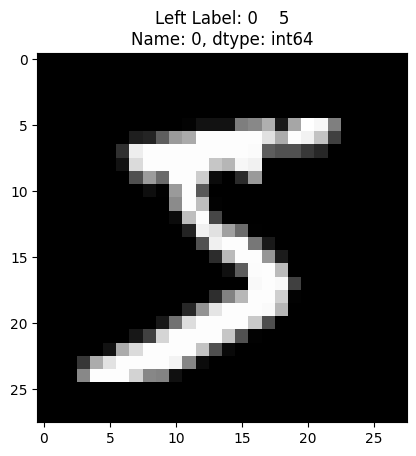
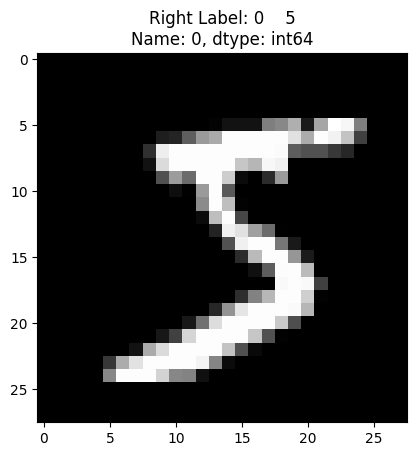

In [ ]:
import numpy as np
import pandas as pd

# Shifting Data up by 1 cell
def Expand_Data(X, y):
  X = np.array(X)
  y = np.array(y)

  if len(X) != len(y):
    return 'Wrong inputs'

  left = np.copy(X)
  right = np.copy(X)
  up = np.copy(X)
  down = np.copy(X)

  for i in range(len(X)):
    tu = up[i].reshape(28,28)
    td = down[i].reshape(28, 28)
    tl = left[i].reshape(28,28)
    tr = right[i].reshape(28,28)
    curr = td[0].copy()
    next = 0

    for j in range (27):
      next = td[j+1].copy()
      td[j+1] = curr.copy()
      curr = next.copy()
      tu[j] = tu[j+1]
      curr1 = tr[j,0]
      next1 = 0

      for k in range(27):
        next1 = tr[j,k+1].copy()
        tr[j,k+1] = curr1.copy()
        curr1 = next1.copy()
        tl[j,k] = tl[j,k+1]
    tl[j,27] = 0
    tr[j,0] = 0
    tu[-1] = np.zeros(28)
    td[0] = np.zeros(28)
    up[i] = np.resize(tu,(1,784))
    down[i] = np.resize(td,(1,784))
    left[i] = np.resize(tl,(1,784))
    right[i] = np.resize(tr,(1,784))

  X = pd.DataFrame(X)
  left = pd.DataFrame(left)
  right = pd.DataFrame(right)
  up = pd.DataFrame(up)
  down = pd.DataFrame(down)
  y = pd.DataFrame(y)

  return pd.concat([X, left, right, up, down],ignore_index=True), pd.concat([y,y,y,y,y], ignore_index=True).squeeze()

In [ ]:
X_train_ex, y_train_ex = Expand_Data(X_train_new, y_train)

In [ ]:
type(X_train_ex), type(y_train_ex), X_train_ex.shape, y_train_ex.shape

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 (300000, 784),
 (300000,))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize classifiers
sgd_clf_ex = SGDClassifier(random_state=42)
nb_clf_ex = GaussianNB()
rf_clf_ex = RandomForestClassifier(random_state=42)

In [ ]:
rf_clf_ex.fit(X_train_ex, y_train_ex)

RandomForestClassifier(random_state=42)

In [ ]:
def evaluate_classifier(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print(f"{clf.__class__.__name__}: Accuracy: {round((scores.mean()*100),2)}%")

# Evaluate each classifier
for clf in (sgd_clf_ex, nb_clf_ex, rf_clf_ex):
    evaluate_classifier(clf, X_train_ex, y_train_ex)

SGDClassifier: Accuracy: 86.28%
GaussianNB: Accuracy: 47.25%
RandomForestClassifier: Accuracy: 96.77%


In [ ]:
rf_clf_ex.score(X_test, y_test)

0.9732

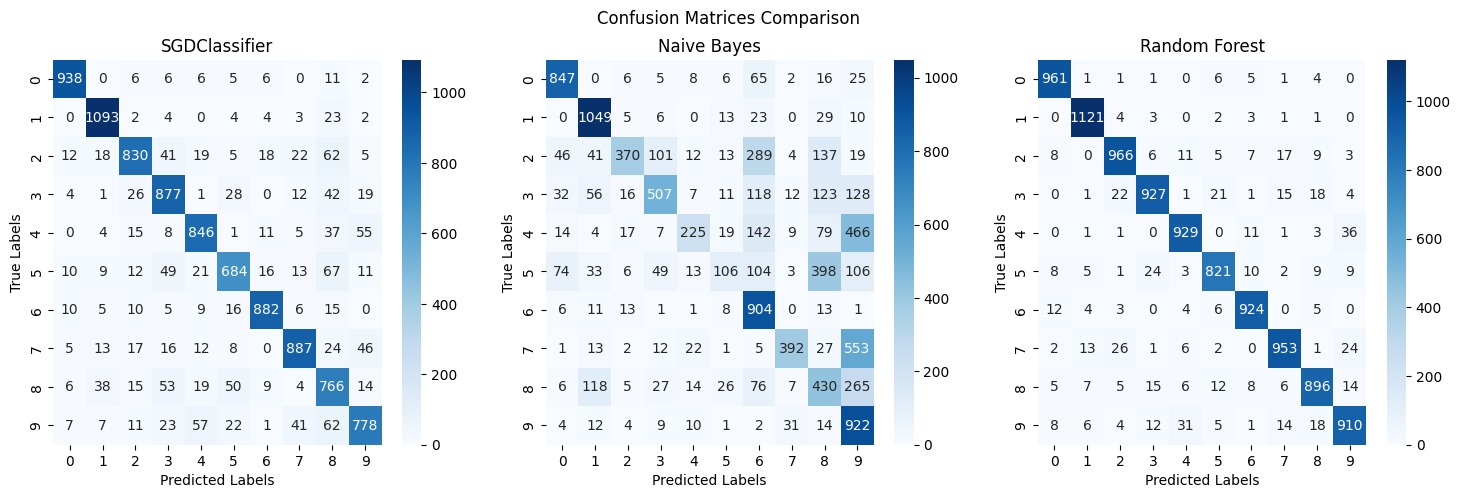

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Correct use of cross_val_predict
y_pred_sgd = cross_val_predict(sgd_clf_ex, X_test, y_test, cv=3)
y_pred_nb = cross_val_predict(nb_clf_ex, X_test, y_test, cv=3)
y_pred_rf = cross_val_predict(rf_clf_ex, X_test, y_test, cv=3)

# Evaluation
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion matrices data
conf_matrices = {
    "SGDClassifier": conf_matrix_sgd,
    "Naive Bayes": conf_matrix_nb,  # Corrected the name
    "Random Forest": conf_matrix_rf
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison')

for i, (model, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine tuning RandomForest
param_grid = {'n_estimators': [10, 50, 100], 'max_features': [10, 50, 784]}

grid_search = GridSearchCV(rf_clf_ex, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_ex, y_train_ex)

# Best parameters
print(grid_search.best_params_)

In [ ]:
from joblib import dump
dump(rf_clf_ex, 'RF_MNIST.joblib')

['RF_MNIST.joblib']

# Code for Submission file

In [ ]:
from joblib import load
import pandas as pd

rf_clf_ex = load('/content/RF_MNIST.joblib')
test = pd.read_csv('/content/test.csv')
test

(28000, 784)

In [ ]:
test.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [ ]:
predictions = rf_clf_ex.predict(test)
pred = {'ImageID':range(1,28001), 'Label':predictions}
pred = pd.DataFrame(pred)
pred.set_index('ImageID')
pred.to_csv('Predictions.csv', index=False)